     block, center = (0,0,0)
          size (2,5,0)
          axes (1,0,0), (0,1,0), (0,0,1)


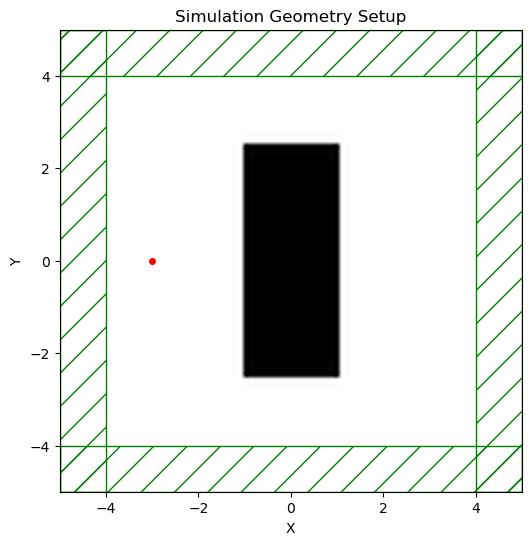

In [14]:
## dielectric lens ## 
import meep as mp
import meep.adjoint as mpa
import numpy as np
from autograd import numpy as npa
import nlopt
import matplotlib.pyplot as plt

Si = mp.Medium(index=3.4)

cell = mp.Vector3(10, 10, 0)
pml_layers = [mp.PML(1.0)]
resolution = 10

# source
source_center = [-3, 0, 0]
fcen = 1 / 1.55
width = 0.2
fwidth = width * fcen
sources = [mp.Source(src=mp.GaussianSource(frequency=fcen,fwidth=fwidth),
                     component=mp.Ez,
                     center=source_center,
                     size=mp.Vector3(0,0,0))]

# design region
Lx = 2
Ly = 5
design_region_resolution = 10
Nx = design_region_resolution * Lx + 1
Ny = design_region_resolution * Ly + 1

design_variables = mp.MaterialGrid(mp.Vector3(Nx,Ny,0),
                                   mp.air,
                                   Si)
design_region = mpa.DesignRegion(design_variables,
                                 volume=mp.Volume(center=mp.Vector3(), 
                                                size=mp.Vector3(Lx,Ly,0)))
init_weights = np.ones((Nx, Ny)) * 0.5
design_variables.update_weights(init_weights)                                

geometry = [mp.Block(center=design_region.center,
                     size=design_region.size,
                     material=design_variables)]

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution
)

plt.figure(figsize=(10, 6))
sim.plot2D()
plt.title("Simulation Geometry Setup")
plt.show()

